# 뉴스 카테고리 다중분류 

## 노드 정리 

### 머신러닝을 이용한 텍스트 분류
#### 텍스트 분류(Text Classification)       
주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크. 자연어 처리 태스크 중 가장 기본이면서 비지니스 영역에서도 가장 수요가 높다.

- 텍스트 분류의 영역    
스팸 메일 자동 분류, 감성 분류(리뷰의 긍정, 부정 판단), 뉴스 카테고리 분류 등 

- 텍스트 분류의 과정   

![](https://images.velog.io/images/guide333/post/ff879870-2023-4881-9421-a336ea392e04/Screenshot%20from%202021-04-09%2009-39-34.png)

설명: 주어진 문장/문서의 __벡터화__ -> AI 모델에 입력 -> 예측한 카테고리 리턴 

벡터화 방법으로는 __워드 임베딩__ 을 사용하고, RNN, CNN, BERT 등의 딥러닝 모델을 사용해 클래스를 예측한다. 

텍스트 분류는 RNN의 다-대-일 문제이다. 텍스트 분류는 모든 시점에 대해 입력을 받지만 최종 시점의 RNN셀만 은닉 상태를 출력하고 이것이 출력층으로 가서 활성화 함수를 통해 정답을 고르는 문제이다. 

- 텍스트 분류의 종류     
  - 클래스가 2개인 이진 분류(Binary Classification) - 스팸 메일 자동 분류, 감성분류, 출력층의 활성화 함수는 시그모이드 함수, 손실함수로 binary_crossentropy를 사용한다. 
  - 클래스가 3개 이상인 다중 클래스 분류(Multiclass Classification) - 뉴스 카테고리 분류, 출력층의 활성화함수로 소프트맥스 함수, 손실함수로 categorical_crossentropy를 사용한다. 클래스가 N개라면 출력층의 뉴런의 수도 N개이다. 
  
### 로이터 뉴스 데이터 
자연어 처리에서는 텍스트를 수치화하는 과정이 필요하나 텐서플로우 데이터셋에서는 이미 토큰화와 정수 인코딩(각 단어를 정수로 변환)가 되어 있어 데이터를 출력하면 숫자 시퀀스가 나온다. 또한 데이터에 단어들이 몇 번 등장하는 지의 빈도에 따라 인덱스를 부여하였다. 

### num_words
데이터에서 빈도수를 기준으로 상위 몇 번째 단위까지 사용할 것인지를 조절한다. 각 단어에 고유 번호가 정해져 있고 이를 통해 사용할 단어의 수를 정한다. 데이터의 단어는 등장 빈도수가 높을수록 낮은 정수가 맵핑되어 있다. 즉 1번이면 제일 빈도수가 높은 단어이다. 여기서는 빈도수가 높은 단어만 사용한다. 여기서 1-10000번 단어보다 더 낮은 빈도수의 단어는 사라지는 것이 아니라 특정 번호로 맵핑되고, 이는 OOV문제를 야기할 수 있다.


### 벡터화
벡터화는 Word Embedding, Document Embedding, Contextual Embedding 등의 인공 신경망을 사용하거나 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬 등과 같은 머신러닝을 사용하는 방법이 있다. 

### 머신러닝 모델
[[GD-P2] 머신러닝 모델 정리](https://velog.io/@guide333/GD-P2-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EC%A0%95%EB%A6%AC) 참고

### 분류성능평가지표
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)

- Precision    
모델이 True라고 분류한 것 중 실제 True인 것의 비율. Positive 정답률

$(Precision) = \frac {TP}{TP + FP}$

- Recall    
실제 True인 것 중 모델이 True라고 예측한 것의 비율. sensitivity, hit rate.

$(Precision) = \frac {TP}{TP + FN}$

Precision과 Recall은 trade-off 관계이고 두 지표가 높을수록 좋은 모델이다. 

- Accuracy    
True를 True로, False를 False로 옳게 예측한 경우. 가장 직관적으로 모델의 성능을 나타내는 평가 지표. 그러나 data의 domain이 불균형하면 예측 성능이 낮아진다. 

$(Accuracy) = \frac {TP + TN}{TP + FN + FP + TN}$

- F1 Score     
Precision과 Recall의 조화 평균. 데이터 label이 불균형할 때 모델의 성능을 정확히 평가할 수 있고 성능을 하나의 숫자로 표현한다.  

$(F1-score) = 2 x \frac {Precision x Recall}{Precision + Recall}$

사이킷런의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공한다. 이 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가한다.
## 프로젝트 순서
1. Vocabulary Size를 변경해서 다양한 머신러닝 모델의 정확도 확인        
  1) 모든 단어 사용      
  2) 빈도수 상위 5,000개의 단어만 사용      
  3) 직접 단어 갯수를 설정해서 사용        
2. 딥러닝 모델과 비교해보기

## 4-9. 프로젝트: Vocabulary Size를 변경해서 시도해보기
지금까지는 모델을 변경하고, 모델을 조합해서 성능을 올리는 일에 힘썼습니다. 그런데 어쩌면 성능을 높이는 방법은 단순히 모델을 조정하는 일이 한정되지 않을 수 있습니다. 데이터의 전처리는 모델의 성능에 영향을 직접적으로 줍니다. 특히나 Bag of Words를 기반으로 하는 DTM이나 TF-IDF의 경우, 사용하는 단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 줄 수 있겠죠.

중요도가 낮은 단어들까지 포함해서 너무 많은 단어를 사용하는 경우에도 성능이 저하될 수 있고, 반대로 너무 적은 단어들을 사용해도 성능이 저하될 수 있습니다. 그리고 이렇게 변화된 단어의 수는 또 어떤 모델을 사용하느냐에 따라 유리할 수도, 불리할 수도 있습니다.

단어의 수에 따라서 모델의 성능이 어떻게 변하는지 테스트해 봅시다.

```python
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
```

앞서 ```num_words```로 사용할 단어의 수를 조정할 수 있다는 것을 배웠습니다. 빈도수가 많은 순서대로 나열했을 때, ```num_words```의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 ```<unk>```로 처리하는 원리였었죠.

아래의 두 가지 경우에 대해서 지금까지 사용했던 모델들의 정확도를 직접 확인해 보세요.


In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

### 1. 모든 단어 사용

```python
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
```

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [3]:
print("훈련 샘플의 수:{}".format(len(x_train)))
print("테스트 샘플의 수:{}".format(len(x_test)))

훈련 샘플의 수:8982
테스트 샘플의 수:2246


In [4]:
print(x_train[0])
print("-" * 70)
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
----------------------------------------------------------------------
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 28

로이터 뉴스 데이터는 이미 전처리를 마친 후의 데이터이므로 숫자 인코딩이 되어 있다.

In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
# 클래스의 수 보기
num_classes = max(y_train) + 1
print("클래스의 수: {}".format(num_classes))

클래스의 수: 46


훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145.5398574927633


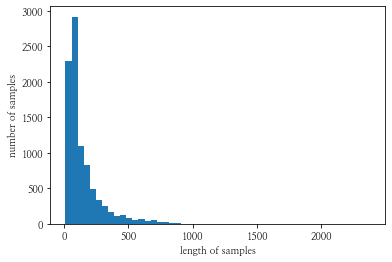

In [7]:
print("훈련용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_train)))
print("훈련용 뉴스의 평균 길이: {}".format(sum(map(len, x_train))/len(x_train)))
      
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

<AxesSubplot:ylabel='count'>

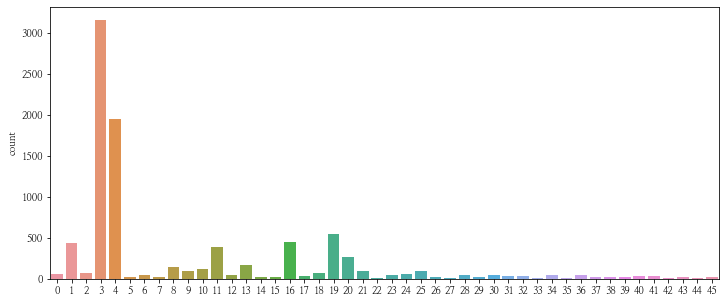

In [8]:
# 클래스의 분포 보기
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [9]:
# 수치로 확인
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [11]:
# 위와 같은 코드
label_cnt = dict(zip(unique_elements, counts_elements))
print(label_cnt)

{0: 55, 1: 432, 2: 74, 3: 3159, 4: 1949, 5: 17, 6: 48, 7: 16, 8: 139, 9: 101, 10: 124, 11: 390, 12: 49, 13: 172, 14: 26, 15: 20, 16: 444, 17: 39, 18: 66, 19: 549, 20: 269, 21: 100, 22: 15, 23: 41, 24: 62, 25: 92, 26: 24, 27: 15, 28: 48, 29: 19, 30: 45, 31: 39, 32: 32, 33: 11, 34: 50, 35: 10, 36: 49, 37: 19, 38: 19, 39: 24, 40: 36, 41: 30, 42: 13, 43: 21, 44: 12, 45: 18}


### 데이터 복원

In [12]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")

# reuters.get_word_index에는 실제 단어에 매핑한 정수에 -3을 해주었으므로 +3을 해준다.
index_to_word = {index + 3: word for word, index in word_index.items()}

# <pad>:0, <sos>:1, <unk>:2 토큰 넣어주기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [19]:
# print(word_index)

In [23]:
# print(index_to_word)

In [21]:
# 뉴스 데이터를 텍스트 데이터로 변환(훈련, 테스트)

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [12]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [13]:
x_train[0]

'<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [14]:
x_test[0]

'<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3'

### 벡터화

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
# DTM 만들기
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [17]:
# TF-IDF 행렬 만들기
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


In [18]:
# 평가 데이터를 TF-IDF로 변환
x_test_dtm = dtmvector.transform(x_test)  # DTM 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM -> TF-IDF

## 머신러닝 모델 사용하기 

In [19]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [20]:
def models_accuracy(tfidfv, tfidfv_test, y_train, y_test):
    # 나이브 베이즈 분류기
    
    mod = MultinomialNB()
    mod.fit(tfidfv, y_train)
    
    predicted = mod.predict(tfidfv_test)
    print("나이브 베이즈 정확도:", accuracy_score(y_test, predicted))
    print("나이브 베이즈 f1 score:", f1_score(y_test, predicted, average='weighted'))
    
 
    # Complement Naive Bayes Classifier(CNB)
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    
    predicted = cb.predict(tfidfv_test)
    print("CMB 정확도:", accuracy_score(y_test, predicted))
    print("CMB f1 score:", f1_score(y_test, predicted, average='weighted'))
    
    # 로지스틱 회귀(Logistic Regression)
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)
    
    predicted = lr.predict(tfidfv_test)
    print("로지스틱 회귀 정확도:", accuracy_score(y_test, predicted))
    print("로지스틱 회귀 f1 score:", f1_score(y_test, predicted, average='weighted'))
    
    # 선형 서포트 벡터 머신(SVM)
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    
    predicted = lsvc.predict(tfidfv_test)
    print("SVM 정확도:", accuracy_score(y_test, predicted))
    print("SVM f1 score:", f1_score(y_test, predicted, average='weighted'))
    
    # Decision Tree
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    
    predicted = tree.predict(tfidfv_test)
    print("Decision Tree 정확도:", accuracy_score(y_test, predicted))
    print("Decision Tree f1 score:", f1_score(y_test, predicted, average='weighted'))
    
    # 랜덤 포레스트
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    
    predicted = forest.predict(tfidfv_test)
    print("랜덤 포레스트 정확도:", accuracy_score(y_test, predicted))
    print("랜덤 포레스트 f1 score:", f1_score(y_test, predicted, average='weighted'))
    
    # 그래디언트 부스팅 트리
    grbt = GradientBoostingClassifier(random_state=0) # verbose=3
    grbt.fit(tfidfv, y_train)  # 시간이 오래 걸림(10분 넘음)
    
    predicted = grbt.predict(tfidfv_test)
    print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, predicted))
    print("그래디언트 부스팅 트리 f1 score:", f1_score(y_test, predicted, average='weighted'))
    
    # 보팅
    voting_classifier = VotingClassifier(estimators=[
          ('lr', LogisticRegression(C=10000, penalty='l2')),
          ('cb', ComplementNB()),
          ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    
    predicted = voting_classifier.predict(tfidfv_test)
    print("보팅 정확도:", accuracy_score(y_test, predicted))
    print("보팅 f1 score:", f1_score(y_test, predicted, average='weighted'))
    

In [21]:
models_accuracy(tfidfv, tfidfv_test, y_train, y_test)

나이브 베이즈 정확도: 0.5997328584149599
나이브 베이즈 f1 score: 0.5045670886188423
CMB 정확도: 0.7649154051647373
CMB f1 score: 0.7346534179503126
로지스틱 회귀 정확도: 0.813446126447017
로지스틱 회귀 f1 score: 0.8079349566211766
SVM 정확도: 0.7791629563668745
SVM f1 score: 0.7735699243235148
Decision Tree 정확도: 0.6211041852181657
Decision Tree f1 score: 0.5769283128518846
랜덤 포레스트 정확도: 0.6544968833481746
랜덤 포레스트 f1 score: 0.6225909375608356
그래디언트 부스팅 트리 정확도: 0.7702582368655387
그래디언트 부스팅 트리 f1 score: 0.7641672650539437
보팅 정확도: 0.8187889581478184
보팅 f1 score: 0.8147231278247327


### 2. 빈도수 상위 5,000개의 단어만 사용

```python
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
```

In [22]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [23]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")

# reuters.get_word_index에는 실제 단어에 매핑한 정수에 -3을 해주었으므로 +3을 해준다.
index_to_word = {index + 3: word for word, index in word_index.items()}

# <pad>:0, <sos>:1, <unk>:2 토큰 넣어주기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [24]:
# 뉴스 데이터를 텍스트 데이터로 변환(훈련, 테스트)

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [25]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

### 벡터화

In [27]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [28]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


In [29]:
x_test_dtm = dtmvector.transform(x_test)  # DTM 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM -> TF-IDF

In [30]:
models_accuracy(tfidfv, tfidfv_test, y_train, y_test)

나이브 베이즈 정확도: 0.6731967943009796
나이브 베이즈 f1 score: 0.6012501291711391
CMB 정확도: 0.7707034728406055
CMB f1 score: 0.7458990404916549
로지스틱 회귀 정확도: 0.8058771148708815
로지스틱 회귀 f1 score: 0.7994583667437475
SVM 정확도: 0.7680320569902048
SVM f1 score: 0.7631712079535768
Decision Tree 정확도: 0.6179875333926982
Decision Tree f1 score: 0.5729970881280324
랜덤 포레스트 정확도: 0.701246660730187
랜덤 포레스트 f1 score: 0.6770217603524399
그래디언트 부스팅 트리 정확도: 0.767586821015138
그래디언트 부스팅 트리 f1 score: 0.7662475269931749
보팅 정확도: 0.8161175422974176
보팅 f1 score: 0.8126712904613167


### 3. 직접 단어 갯수를 설정해서 사용
위 단계에서 5000으로 제시된 ```num_words```를 다양하게 바꾸어 가며 성능을 확인해보세요. 변화된 단어 수에 따른 모델의 성능을 연구해 보세요. 최소 3가지 경우 이상을 실험해 보기를 권합니다.

>사용할 모델
>
>나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅


#### 3000 개

In [31]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=3000, test_split=0.2)

In [32]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")

# reuters.get_word_index에는 실제 단어에 매핑한 정수에 -3을 해주었으므로 +3을 해준다.
index_to_word = {index + 3: word for word, index in word_index.items()}

# <pad>:0, <sos>:1, <unk>:2 토큰 넣어주기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [33]:
# 뉴스 데이터를 텍스트 데이터로 변환(훈련, 테스트)

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [34]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

### 벡터화

In [36]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 2919)


In [37]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 2919)


In [38]:
x_test_dtm = dtmvector.transform(x_test)  # DTM 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM -> TF-IDF

In [39]:
models_accuracy(tfidfv, tfidfv_test, y_train, y_test)

나이브 베이즈 정확도: 0.6874443455031166
나이브 베이즈 f1 score: 0.6266168450864102
CMB 정확도: 0.7644701691896705
CMB f1 score: 0.7369718160654114
로지스틱 회귀 정확도: 0.794746215494212
로지스틱 회귀 f1 score: 0.7898493631150233
SVM 정확도: 0.744879786286732
SVM f1 score: 0.7401980202704703
Decision Tree 정확도: 0.6260017809439002
Decision Tree f1 score: 0.580006731123168
랜덤 포레스트 정확도: 0.6856634016028496
랜덤 포레스트 f1 score: 0.6591675010462239
그래디언트 부스팅 트리 정확도: 0.7756010685663401
그래디언트 부스팅 트리 f1 score: 0.7720993479918031
보팅 정확도: 0.8103294746215495
보팅 f1 score: 0.8061827291048885


#### 8000개

In [40]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=8000, test_split=0.2)

In [41]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")

# reuters.get_word_index에는 실제 단어에 매핑한 정수에 -3을 해주었으므로 +3을 해준다.
index_to_word = {index + 3: word for word, index in word_index.items()}

# <pad>:0, <sos>:1, <unk>:2 토큰 넣어주기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [42]:
# 뉴스 데이터를 텍스트 데이터로 변환(훈련, 테스트)

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [43]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

### 벡터화

In [45]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 7772)


In [46]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 7772)


In [47]:
x_test_dtm = dtmvector.transform(x_test)  # DTM 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM -> TF-IDF

In [48]:
models_accuracy(tfidfv, tfidfv_test, y_train, y_test)

나이브 베이즈 정확도: 0.6625111308993766
나이브 베이즈 f1 score: 0.5832772940898228
CMB 정확도: 0.7707034728406055
CMB f1 score: 0.7468888117983166
로지스틱 회귀 정확도: 0.8098842386464826
로지스틱 회귀 f1 score: 0.8045664468720659
SVM 정확도: 0.7764915405164737
SVM f1 score: 0.7717867825345066
Decision Tree 정확도: 0.6206589492430988
Decision Tree f1 score: 0.5741562924518827
랜덤 포레스트 정확도: 0.6669634906500446
랜덤 포레스트 f1 score: 0.6386081274272609
그래디언트 부스팅 트리 정확도: 0.7644701691896705
그래디언트 부스팅 트리 f1 score: 0.7602265349360933
보팅 정확도: 0.813446126447017
보팅 f1 score: 0.8099987343995103


#### 10000개

In [49]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [50]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")

# reuters.get_word_index에는 실제 단어에 매핑한 정수에 -3을 해주었으므로 +3을 해준다.
index_to_word = {index + 3: word for word, index in word_index.items()}

# <pad>:0, <sos>:1, <unk>:2 토큰 넣어주기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [51]:
# 뉴스 데이터를 텍스트 데이터로 변환(훈련, 테스트)

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [52]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

### 벡터화

In [54]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [55]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [56]:
x_test_dtm = dtmvector.transform(x_test)  # DTM 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM -> TF-IDF

In [57]:
models_accuracy(tfidfv, tfidfv_test, y_train, y_test)

나이브 베이즈 정확도: 0.6567230632235085
나이브 베이즈 f1 score: 0.5764467518778252
CMB 정확도: 0.7707034728406055
CMB f1 score: 0.7456682614453047
로지스틱 회귀 정확도: 0.8076580587711487
로지스틱 회귀 f1 score: 0.8014651882605348
SVM 정확도: 0.7693677649154052
SVM f1 score: 0.7637759765488678
Decision Tree 정확도: 0.6202137132680321
Decision Tree f1 score: 0.5776398779280149
랜덤 포레스트 정확도: 0.674087266251113
랜덤 포레스트 f1 score: 0.6429484177284822
그래디언트 부스팅 트리 정확도: 0.7666963490650045
그래디언트 부스팅 트리 f1 score: 0.7625990588567523
보팅 정확도: 0.8116651825467498
보팅 f1 score: 0.8082216149049796


#### 15,000개

In [58]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000, test_split=0.2)

In [59]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")

# reuters.get_word_index에는 실제 단어에 매핑한 정수에 -3을 해주었으므로 +3을 해준다.
index_to_word = {index + 3: word for word, index in word_index.items()}

# <pad>:0, <sos>:1, <unk>:2 토큰 넣어주기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [60]:
# 뉴스 데이터를 텍스트 데이터로 변환(훈련, 테스트)

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [61]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

### 벡터화

In [63]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 14227)


In [64]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 14227)


In [65]:
x_test_dtm = dtmvector.transform(x_test)  # DTM 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM -> TF-IDF

In [66]:
models_accuracy(tfidfv, tfidfv_test, y_train, y_test)

나이브 베이즈 정확도: 0.6331255565449688
나이브 베이즈 f1 score: 0.5498212868794679
CMB 정확도: 0.7720391807658059
CMB f1 score: 0.7448186439256785
로지스틱 회귀 정확도: 0.8125556544968834
로지스틱 회귀 f1 score: 0.8055609374268625
SVM 정확도: 0.780053428317008
SVM f1 score: 0.7747889325121782
Decision Tree 정확도: 0.6193232413178985
Decision Tree f1 score: 0.5755585664009136
랜덤 포레스트 정확도: 0.6714158504007124
랜덤 포레스트 f1 score: 0.6406930098492383
그래디언트 부스팅 트리 정확도: 0.7707034728406055
그래디언트 부스팅 트리 f1 score: 0.7679462922982356
보팅 정확도: 0.8165627782724845
보팅 f1 score: 0.8132601841863839


## 머신러닝 결과 비교(정확도와 f1 score)
- 3천개    
  - 정확도: Decision Tree(63%) < 랜덤 포레스트 정확도(68.6%) < 나이브 베이즈(68.7%) < SVM(75%) < CMB(76%) < 그래디언트 부스팅 트리(77.6%) < 로지스틱 회귀(79%) < 보팅(81.0%)       
  - f1 score: Decision Tree(58%) < 나이브 베이즈(63%) < 랜덤 포레스트 정확도(65.9%) < CMB(74%) < SVM(75%) < 그래디언트 부스팅 트리(77.2%) < 로지스틱 회귀(79%) < 보팅(80.6%) 

- 5천개     
  - 정확도: Decision Tree(62%) < 나이브 베이즈(67%) < 랜덤 포레스트 정확도(70%) < 그래디언트 부스팅 트리(76.8%) < CMB(77.1%) < SVM(77.2%) < 로지스틱 회귀(81%) < 보팅(81.6%)       
  - f1 score: Decision Tree(57%) < 나이브 베이즈(60%) < 랜덤 포레스트 정확도(68%) < CMB(75%) < 그래디언트 부스팅 트리(76.62%) < SVM(76.69%) < 로지스틱 회귀(80%) < 보팅(81.2%) 

- 8천개       
  - 정확도: Decision Tree(62%) < 나이브 베이즈(66%) < 랜덤 포레스트 정확도(66.7%) < 그래디언트 부스팅 트리(76%) < SVM(76.7%) < CMB(77.1%) < 로지스틱 회귀(81%) < 보팅(81.3%)         
  - f1 score: Decision Tree(57%) < 나이브 베이즈(58%) < 랜덤 포레스트 정확도(64%) < CMB(75%) < 그래디언트 부스팅 트리(76%) < SVM(76.2%) < 로지스틱 회귀(80%) < 보팅(80.9%) 

- 1만개             
  - 정확도: Decision Tree(62%) < 나이브 베이즈(66%) < 랜덤 포레스트 정확도(67%) < 그래디언트 부스팅 트리(76.7%) < CMB(77%) < SVM(77.4%) < 로지스틱 회귀(80.8%) < 보팅(81.2%)      
  - f1 score: 나이브 베이즈(57.6%) < Decision Tree(57.8%) < 랜덤 포레스트 정확도(64%) < CMB(75%) < 그래디언트 부스팅 트리(76%) < SVM(77%) < 로지스틱 회귀(80%) < 보팅(80.8%) 

- 1만 5천개   
  - 정확도: Decision Tree(62%) < 나이브 베이즈(63%) < 랜덤 포레스트 정확도(67%)  < 그래디언트 부스팅 트리(77.1%) < CMB(77.2%) < SVM(78%) < 로지스틱 회귀(81%) < 보팅(81.7%)       
  - f1 score: 나이브 베이즈(55%) < Decision Tree(57%) < 랜덤 포레스트 정확도(64%) < CMB(74%) < 그래디언트 부스팅 트리(77%) < SVM(78%) < 로지스틱 회귀(80.1%) < 보팅(81.3%) 

- 전체    
  - 정확도: 나이브 베이즈(60%) < Decision Tree(62%) < 랜덤 포레스트 정확도(65%) < CMB(76%) < 그래디언트 부스팅 트리(77%) < SVM(78%) < 로지스틱 회귀(81%) < 보팅(81.9%)        
  - f1 score: 나이브 베이즈(50%) < Decision Tree(58%) < 랜덤 포레스트 정확도(62%) < CMB(73%) < 그래디언트 부스팅 트리(76%) < SVM(77%) < 로지스틱 회귀(80.7%) < 보팅(81.4%) 
  
  

- 정확도    
위의 결과를 보았을 때 전체적으로 보팅이 가장 높은 성능을 보였고, 단어의 수는 전체일 때 가장 높은 정확도를 보였다. 단어의 수가 줄어들수록 정확도는 조금씩 떨어지는 것을 볼 수 있었다. 모델마다 단어의 수에 따라 정확도 순위는 조금씩 바뀌었다. 예를 들어 나이브 베이즈의 경우는 단어의 수가 적을수록 더 높은 결과를 보였다. 그러나 전체적으로 보았을 때는 단어 수를 조절해도 머신러닝 모델의 정확도는 아주 큰 차이를 보이는 것 같지는 않다. 

각 모델의 정확도의 순위도 단어의 수에 따라 변했다. 그래서 보팅 외에는 어떤 모델이 성능이 더 좋은지를 단정하기는 어려웠다.  

- f1 score    
f1 score는 데이터가 불균형한 다중 분류 모델에서 사용되는 평가 지표이지만 위의 결과를 보면 정확도와 순위와 점수가 거의 비슷하다는 것을 볼 수 있다. 


- 참고    
num_words(단어의 수)에 따라 TF-IDF 행렬의 크기가 달라짐을 볼 수 있었다. 

### 4. 딥러닝 모델과 비교해 보기
위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

```num_words=10000```으로 하였다. 

In [41]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping

In [42]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [43]:
print(len(x_train), len(x_test))

8982 2246


In [44]:
# 클래스의 수 보기
num_classes = max(y_train) + 1
print("클래스의 수: {}".format(num_classes))

클래스의 수: 46


훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145.5398574927633


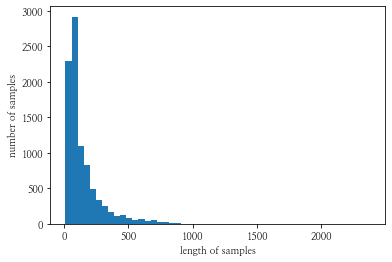

In [45]:
print("훈련용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_train)))
print("훈련용 뉴스의 평균 길이: {}".format(sum(map(len, x_train))/len(x_train)))
      
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

테스트용 뉴스의 최대 길이: 1032
테스트용 뉴스의 평균 길이: 147.66117542297417


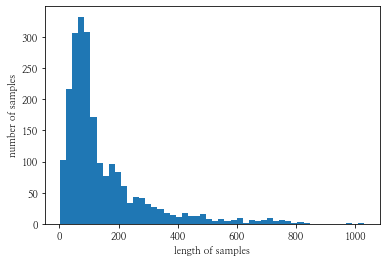

In [46]:
print("테스트용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_test)))
print("테스트용 뉴스의 평균 길이: {}".format(sum(map(len, x_test))/len(x_test)))
      
plt.hist([len(s) for s in x_test], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

훈련용 뉴스 기사 데이터와 테스트용 뉴스 기사 데이터에 있는 각각의 뉴스의 길이는 다르다.따라서 모델의 입력으로 사용하고자 모든 뉴스 기사의 길이를 동일하게 맞춰준다. keras.preprocessing.sequence.pad_sequences()를 사용하면 단어의 수가 100개보다 많으면 100개만 선택하고 나머지는 제거하며, 100개보다 부족한 경우에는 부족한 부분을 0으로 패딩한다. 

In [47]:
# padding
maxlen = 100
x_train = keras.preprocessing.sequence.pad_sequences(x_train, padding='pre', maxlen=maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(x_test, padding='pre', maxlen=maxlen)

In [48]:
print(x_test[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1   53  134   26   14  102   26   39
 5150   18   14 2013   18   86   44 4121   18   14   44 4577   18  180
  183   32 4335   18   14   32 6118   18   29   53 1045   26   14   19
  821   15   39   32 1842   18   14   32 5821   18   86  284   32   11
   14  284   12   11  180  183   32 3762   18   14   32 4846   18  123
   48   98   39  235  785   18  150  728   22    2    5  205  131  291
   17   12]


In [49]:
print(y_train)

[ 3  4  3 ... 25  3 25]


In [50]:
# 데이터의 레이블에 원-핫 인코딩을 한다. 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [52]:
print(y_train.shape, y_test.shape)

(8982, 46) (2246, 46)


In [53]:
# http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221226716255 참고

from tensorflow.keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

1. RNN(LSTM)

In [173]:
vocab_size = 10000    # 어휘 사전의 크기(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

# RNNmodel 설계 
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(128))   # LSTM 레이어를 사용하였다. LSTM state 벡터의 차원수는 8
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))  # 최종 출력은 긍정/부정을 나타내는 1 dim

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 46)                2990      
Total params: 1,128,494
Trainable params: 1,128,494
Non-trainable params: 0
_________________________________________________________________


In [175]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1score])



In [176]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es], validation_split=0.2)

Epoch 1/30
57/57 [==============================] - 2s 22ms/step - loss: 3.2489 - accuracy: 0.3082 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1score: 0.0000e+00 - val_loss: 2.3959 - val_accuracy: 0.3450 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 2/30
57/57 [==============================] - 1s 15ms/step - loss: 2.2792 - accuracy: 0.4105 - precision: 0.4319 - recall: 0.1291 - f1score: 0.1978 - val_loss: 2.0950 - val_accuracy: 0.4719 - val_precision: 0.9733 - val_recall: 0.2488 - val_f1score: 0.3943
Epoch 3/30
57/57 [==============================] - 1s 16ms/step - loss: 2.0468 - accuracy: 0.4966 - precision: 0.9426 - recall: 0.2821 - f1score: 0.4329 - val_loss: 2.0093 - val_accuracy: 0.5031 - val_precision: 0.9449 - val_recall: 0.2800 - val_f1score: 0.4299
Epoch 4/30
57/57 [==============================] - 1s 16ms/step - loss: 1.9744 - accuracy: 0.5214 - precision: 0.9367 - recall: 0.3048 - f1score: 0.4578 - val_loss: 1.9242 - val_accuracy

In [177]:
_loss, _precision, _accuracy, _recall, _f1score = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.7732 - accuracy: 0.6358 - precision: 0.7532 - recall: 0.5915 - f1score: 0.6612


In [179]:
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1 score: {:.3f}'.format(_loss, _accuracy, _precision, _recall, _f1score))

loss: 1.773, accuracy: 0.753, precision: 0.636, recall: 0.592, f1 score: 0.661


2. 1-D CNN

In [54]:
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

# 모델 구성(1D-CNN)
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(Dropout(0.3))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(46, activation='softmax')) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 16)          11216     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1score])



In [56]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es], validation_split=0.2)

Epoch 1/30
57/57 [==============================] - 2s 20ms/step - loss: 3.7644 - accuracy: 0.0439 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1score: 0.0000e+00 - val_loss: 3.1685 - val_accuracy: 0.3450 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 2/30
57/57 [==============================] - 1s 14ms/step - loss: 3.1212 - accuracy: 0.2438 - precision: 0.3932 - recall: 0.0285 - f1score: 0.0509 - val_loss: 2.3080 - val_accuracy: 0.3573 - val_precision: 0.9570 - val_recall: 0.2555 - val_f1score: 0.4017
Epoch 3/30
57/57 [==============================] - 1s 13ms/step - loss: 2.5126 - accuracy: 0.3584 - precision: 0.8403 - recall: 0.2026 - f1score: 0.3244 - val_loss: 2.0549 - val_accuracy: 0.4452 - val_precision: 0.9178 - val_recall: 0.2857 - val_f1score: 0.4333
Epoch 4/30
57/57 [==============================] - 1s 13ms/step - loss: 2.2869 - accuracy: 0.4093 - precision: 0.8465 - recall: 0.2695 - f1score: 0.4074 - val_loss: 1.9141 - val_accuracy

In [57]:
_loss, _precision, _accuracy, _recall, _f1score = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.7636 - accuracy: 0.6060 - precision: 0.8660 - recall: 0.5107 - f1score: 0.6388


In [58]:
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1 score: {:.3f}'.format(_loss, _accuracy, _precision, _recall, _f1score))

loss: 1.764, accuracy: 0.866, precision: 0.606, recall: 0.511, f1 score: 0.639


### 머신러닝과 딥러닝 모델 비교 (num_words: 1만개)
머신러닝 중 가장 성능이 좋았던 ```num_words=None```를 사용하려 하였으나 단어의 수가 너무 커서 에러 메시지가 났다. 그래서 머신러닝과 딥러닝 모델의 단어 수를 1만개로 맞춰주었다. 

- 머신러닝 모델    
정확도: Decision Tree(62%) < 나이브 베이즈(66%) < 랜덤 포레스트 정확도(67%) < 그래디언트 부스팅 트리(76.7%) < CMB(77%) < SVM(77.4%) < 로지스틱 회귀(80.8%) < 보팅(81.2%)
f1 score: 나이브 베이즈(57.6%) < Decision Tree(57.8%) < 랜덤 포레스트 정확도(64%) < CMB(75%) < 그래디언트 부스팅 트리(76%) < SVM(77%) < 로지스틱 회귀(80%) < 보팅(80.8%)

- 딥러닝 모델(LSTM)    
loss: 1.773, accuracy: 0.753, precision: 0.636, recall: 0.592, f1 score: 0.661
- 딥러닝 모델(1D-CNN)        
loss: 1.760, accuracy: 0.856, precision: 0.565, recall: 0.495, f1 score: 0.624

LSTM 모델의 정확도는 75%, f1 score는 66%이고, 1D-CNN 모델의 정확도는 87%, f1 score는 64%이다. 다양한 머신러닝 모델과 비교해 보았을 때, LSTM 모델과 1D-CNN의 f1 score는 중간 정도의 성능을 보여준다. 그러나 딥러닝모델의 경우, 하이퍼파라미터를 조절하거나 레이어를 여러 개 쌓으면 성능이 충분히 올라갈 수 있기 때문에 위의 결과로 어느 모델이 더 좋은 성능을 보인다고는 속단하기는 어려운 것 같다. 

### 루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.

|평가문항|	상세기준||
|:------:|:--------:|:--------:|
|1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?|코퍼스 분석, 전처리, 3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.|Y|
|2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?|Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.|Y|
|3. 생성모델의 metric(BLEU 등) 기준 이상 높은 성능이 확인되었는가?|동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.| Y|


## 후기
### 이번 프로젝트에서 어려웠던 점
- 딥러닝 모델을 사용한 다중 분류는 위키독스를 참고하였다. 그런데 처음에 모델이 제대로 작동하지 않아 어려움을 겪었다. 알고보니 embedding에 넣을 인자 때문이었다. 또한 단어의 수(num_words)의 크기가 크면 모델이 제대로 동작되지 않아서 단어의 수를 1만개로 줄여야 했다.

### 프로젝트를 진행하면서 알게된 점
- 다양한 머신러닝의 종류와 기본적인 개념
- num_words의 의미, OOV의 개념 등
- 이중분류와 다중분류의 차이점: y_label의 수, 활성화함수(시그모이드 함수/소프트맥스 함수), 손실함수(binary_crossentropy/categorical_crossentropy), 평가 지표(정확도, f1 score)

### 프로젝트를 진행하면서 아직 모호한 점
다양한 머신러닝 기법에 대해 배웠지만 이론에 대해서는 완벽히 소화하지는 못했다. 

### 자기 다짐
이번 프로젝트까지는 노드에 설명이 자세히 써 있고 참고 자료도 있어서 어렵지 않게 할 수 있었다. 그래서 다른 프로젝트보다 많은 실험을 할 수 있었다. 

- 참고    
https://wikidocs.net/24873    
[뷴류성능평가지표](https://sumniya.tistory.com/26)    
https://wikidocs.net/22933    
[[Keras] 2.0에서 precision,recall 사용하기](http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221226716255)